In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

In [61]:
df_train_total = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
x_headers = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']
y_headers = ['type']
#train/validation split
df_val = df_train_total[-71:]
df_train = df_train_total[:300]
x_train = df_train[x_headers]
x_val = df_val[x_headers]
y_train = df_train[y_headers]
y_val = df_val[y_headers]
x_val

,bone_length,rotting_flesh,hair_length,has_soul,color
300,0.173607,0.589613,0.363439,0.614158,white
301,0.577809,0.500339,0.756629,0.854949,white
302,0.194655,0.456840,0.414884,0.288053,white
303,0.687080,0.536090,0.751614,0.725960,blue
304,0.757138,0.556602,0.760736,0.570260,black
305,0.540088,0.481532,0.717480,0.694784,white
306,0.534001,0.595992,0.850140,0.794247,green
307,0.521237,0.608728,0.946612,0.676993,white
308,0.528536,0.589140,0.651217,0.412176,white
309,0.337804,0.378093,0.694287,0.543536,clear


In [28]:
print('bone_length: Min:', x_train['bone_length'].min(), " Max: ",x_train['bone_length'].max())

bone_length: Min: 0.06103181746759154  Max:  0.8170014327207992


In [29]:
print('rotting_flesh: Min:', x_train['rotting_flesh'].min(), " Max: ",x_train['rotting_flesh'].max())

rotting_flesh: Min: 0.09568664700163136  Max:  0.9324660949062564


In [30]:
print('hair_length: Min:', x_train['hair_length'].min(), " Max: ",x_train['hair_length'].max())

hair_length: Min: 0.13460036259564734  Max:  1.0


In [31]:
print('has_soul: Min:', x_train['has_soul'].min(), " Max: ",x_train['has_soul'].max())

has_soul: Min: 0.009401615878661942  Max:  0.9357213331107028


In [63]:
# Create index mappings for color
color_indices = dict(map(lambda x: (x[1], x[0]), enumerate(set(df_train_total['color']))))
x_train['color'] = x_train['color'].apply(lambda x: color_indices[x])
x_val['color'] = x_val['color'].apply(lambda x: color_indices[x])
x_train

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,4
1,0.575560,0.425868,0.531401,0.439899,1
2,0.467875,0.354330,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,1
5,0.405680,0.253277,0.441420,0.280324,1
6,0.399331,0.568952,0.618391,0.467901,5
7,0.516224,0.536429,0.612776,0.468048,4
8,0.314295,0.671280,0.417267,0.227548,2
9,0.280942,0.701457,0.179633,0.141183,5


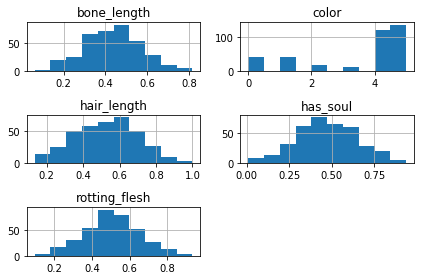

In [44]:
#Data visualisation
x_train.hist()
plt.tight_layout()

In [132]:
#SVM
#Feature selection
cols_to_use = ['bone_length', 
               'rotting_flesh', 
               'hair_length', 
               'has_soul', 
               'color']
x_train_filtered = x_train[cols_to_use]
x_val_filtered = x_val[cols_to_use]
#Gaussian Kernel
svm_rbf = OneVsRestClassifier(SVC(kernel="rbf", gamma=5, C=0.001))
print('Training Accuracy: ', svm_rbf.fit(x_train_filtered, y_train).score(x_train_filtered, y_train))

Training Accuracy:  0.72


In [133]:
y_pred = svm_rbf.predict(x_val_filtered)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[15  0  2]
 [ 1 30  0]
 [ 2 14  7]]
              precision    recall  f1-score   support

       Ghost       0.83      0.88      0.86        17
       Ghoul       0.68      0.97      0.80        31
      Goblin       0.78      0.30      0.44        23

    accuracy                           0.73        71
   macro avg       0.76      0.72      0.70        71
weighted avg       0.75      0.73      0.70        71



In [107]:
#No kernel
svm_linear = OneVsRestClassifier(SVC(kernel="linear", gamma=5, C=0.001))
svm_linear.fit(x_train_filtered, y_train).score(x_train_filtered, y_train)
y_pred = svm_linear.predict(x_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[17  0  0]
 [ 1 30  0]
 [ 3 20  0]]
              precision    recall  f1-score   support

       Ghost       0.81      1.00      0.89        17
       Ghoul       0.60      0.97      0.74        31
      Goblin       0.00      0.00      0.00        23

    accuracy                           0.66        71
   macro avg       0.47      0.66      0.55        71
weighted avg       0.46      0.66      0.54        71



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
#Sigmoid kernel
svm_sigmoid = OneVsRestClassifier(SVC(kernel="sigmoid", gamma=5, C=0.001))
svm_sigmoid.fit(x_train_filtered, y_train).score(x_train_filtered, y_train)
y_pred = svm_sigmoid.predict(x_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[ 0  5 12]
 [ 0  0 31]
 [ 0  0 23]]
              precision    recall  f1-score   support

       Ghost       0.00      0.00      0.00        17
       Ghoul       0.00      0.00      0.00        31
      Goblin       0.35      1.00      0.52        23

    accuracy                           0.32        71
   macro avg       0.12      0.33      0.17        71
weighted avg       0.11      0.32      0.17        71



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
#Grid Search
c_params = [0.01, 0.1, 0.5, 1, 3, 5, 10, 20, 50, 100]
gamma_params = [0.01, 0.1, 0.5, 1, 3, 5]
nfold = 10
param_grid = {'estimator__C': c_params, 'estimator__gamma': gamma_params}
grid_search = GridSearchCV(OneVsRestClassifier(SVC(kernel="rbf")), param_grid, cv=nfold)
grid_search.fit(x_train, y_train)
grid_search.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'estimator__C': 50, 'estimator__gamma': 0.1}

In [145]:
#Gaussian Kernel again with grid-searched hyperparameters
c_param = grid_search.best_params_['estimator__C']
gamma_param = grid_search.best_params_['estimator__gamma']
svm_rbf = OneVsRestClassifier(SVC(kernel="rbf", gamma=gamma_param, C=c_param))
print('Training Accuracy: ', svm_rbf.fit(x_train_filtered, y_train).score(x_train_filtered, y_train))

Training Accuracy:  0.77


In [146]:
y_pred = svm_rbf.predict(x_val)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[14  0  3]
 [ 1 27  3]
 [ 2 10 11]]
              precision    recall  f1-score   support

       Ghost       0.82      0.82      0.82        17
       Ghoul       0.73      0.87      0.79        31
      Goblin       0.65      0.48      0.55        23

    accuracy                           0.73        71
   macro avg       0.73      0.72      0.72        71
weighted avg       0.73      0.73      0.72        71



In [147]:
#Test
test_input = pd.read_csv('test.csv')
df_test = test_input[x_headers] 
df_test['color'] = df_test['color'].apply(lambda x: color_indices[x])
y_test = svm_rbf.predict(df_test)
out_df = pd.DataFrame()
out_df['id'] = test_input['id']
out_df['type'] = y_test
out_df.to_csv('output.csv', index=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
